### 웹 데이터 수집 문법정리
1. 문서 요청 후 응답받기 : urllib패키지
    - urlopen() 접속
    - read() 요청한 데이터 받아오기
    - text 속성을 이용할 수도 있음
    
2. 문서에서 원하는 내용 추출(파싱)  
    - BS4 패키지 사용
    
- urllib2, urllib3
- requests 패키지를 사용 할 수도 있음

In [1]:
# !pip install requests

In [2]:
import requests

In [3]:
url = 'http://www.tistory.com'
response = requests.get(url)

In [4]:
# 정상응답 여부
response.status_code # 응답에 대한 상태코드
# 200 : 정상응답
# 400 : 클라이언트 요청이 잘못되었다는 의미(404 : 잘못된 URL, 403 : 권한 없는 페이지 요청)
# 500 : 클라이언트는 정상 요청, 서버측에서 인증오류(API 요청시 자주 발생), 서버의 코드의 오류

200

In [5]:
response.text
# 요청해서 받은 결과 코드

'\n\t<!doctype html>\n\t<html lang="ko">\n\t<head>\n\t\t<meta charset="utf-8">\n<meta property="og:url" content="https://www.tistory.com">\n<meta property="og:site_name" content="Tistory">\n<meta property="og:title" content="Tistory">\n<meta property="og:description" content="좀 아는 블로거들의 유용한 이야기">\n<meta property="og:image" content="//t1.daumcdn.net/tistory_admin/static/images/openGraph/tistoryOpengraph.png">\n\t\t<title>TISTORY</title>\n<link rel="icon" href="https://t1.daumcdn.net/tistory_admin/favicon/tistory_favicon_32x32.ico" sizes="any">\n<link rel="icon" type="image/svg+xml" href="https://t1.daumcdn.net/tistory_admin/top_v2/bi-tistory-favicon.svg" />\n<link rel="apple-touch-icon" href="https://t1.daumcdn.net/tistory_admin/top_v2/tistory-apple-touch-favicon.png">\t\t<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/tistory_admin/assets/tistory-web-top/1682298798/static/css/ext/swiper.min.css">\n\t\t<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/tistory_a

In [6]:
r = requests.get("https://www.google.co.kr")
len(r.text) # 반환된 코드는 text 형태임
# 반환된 소스 일부 추출
r.text[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content'

In [7]:
r = requests.get("https://www.naver.com")
len(r.text) # 반환된 코드는 text 형태임
# 반환된 소스 일부 추출
r.text[0:100]

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="u'

#### 파라미터 전달 방법
- 파라미터란? : 사이트의 문서를 요청할 때 서버로 전달되는 정보
- 함수의 파라미터 처럼 문서를 찾기위한 정보나 명령을 수행하기 위한 정보를 같이 전달하게 되는데 그 정보를 파라미터라고 함 
- 서버에 파라미터 전송방법
    - 파라미터 전송 방법은 url에 ? 뒤에 파라미터=값&파라미터2=값 으로 전송
        - 사이트에 따라서 잘못된 접속으로 인지하고 에러처리할 수 있음
    - 파라미터를 dict로 구성해서 get(params=dict)


- https://sports.news.naver.com/news?oid=477&aid=0000312064
- params = {'param1': 'value1', 'param2': 'value2'}
- res = requests.get(URL, params=params)

In [8]:
base_url = "https://sports.news.naver.com/news" # 기본 url
param_url ="https://sports.news.naver.com/news?oid=477&aid=0000312064"  

In [9]:
# 파라미터 전달방식 1 : get 방식
# site에 따라 접근 거부할 수도 있음
res1 = requests.get(param_url)
res1.status_code

200

In [10]:
# 파라미터 전달방식 1 : get 방식
# oid=477&aid=0000312064
param = {'oid':477, 'aid': '0000312064'}
res2 = requests.get(param_url,params=param)
res2.status_code

200

### urllib 패키지 사용한 소스 추출

In [11]:
from urllib.request import urlopen

In [12]:
url = 'http://www.naver.com'
html = urlopen(url)
html

In [13]:
# 응답객체에서 소스코드 얻어오기
rawtext = html.read()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
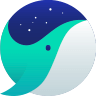
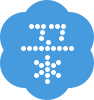

In [14]:
type(rawtext)
bytes(rawtext)
print(rawtext.decode('utf8'))

#### 문서에서 원하는 내용 추출하기(파싱)  
- html 문서에서 원하는 내용 추출
    - 필요한 내용만 추출
    - BeautifulSoup 라이브러리 사용
        - 태그 형식으로 된 text를 파싱할 때 사용
    - find() / findAll() 등 함수 사용
    
#### BeautifulSoup
- import bs4
- 데이터를 추출하는데 필요한 기능이 들어 있는 라이브러리 (파싱 라이브러리)
- 외부 라이브러리 : 설치해야 함
- 주피터는 기본 패키지임(설치하지 않아도 됨)
- 파이참 설치방법
    - File/Settings
    - Project Interpreter에서 bs4 검색
    - [Install Package]    

In [15]:
# !pip install bs4
import bs4

In [16]:
url = "https://www.naver.com"
html = urlopen(url)
html

In [17]:
# bs4 파싱 객체를 반환
bs_obj  = bs4.BeautifulSoup(html,'html.parser')

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
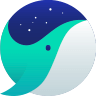
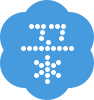

In [18]:
type(bs_obj) # bs4.BeautifulSoup
print(bs_obj.prettify())

#### BeautifulSoup 패키지의 파싱 함수
- find(태그,[{속성명:속성값}])
    - 지정한 태그 중 첫번째 만나는 태그만 추출 또는 지정한 태그 중 해당 속성과 속상값을 갖고있는 태그의 첫번째 태그
- findAll(태그,[{속성명:속성값}])
    - 지정한 태그 모두 찾아서 추출
    - 첫번째 이외의 태그를 추출할 때 사용
    - list 형태로 반환
- find_all(태그,[{속성명:속성값}])
    - findAll 함수와 동일

In [19]:
# test html
html_str = "<html><div>hello</div></html>"

In [20]:
# 1. html 코드 -> 파싱객체로 변환
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
type(bs_obj)
# bs_obj

bs4.BeautifulSoup

In [21]:
bs_obj.find('div')
# type(bs_obj.find('div'))

<div>hello</div>

In [22]:
bs_obj.find('div') # div 태그의 bs4 객체 반환
bs_obj.find('div').text # html코드에서 첫번째 만나는 div태그의 내부 문자열 반환

'hello'

In [23]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

In [24]:
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

In [25]:
ul_t = bs_obj.find('ul')
ul_t

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [26]:
type(ul_t.find('li')) # ul_t 태그 객체에서 첫번째 만나는 li 태그를 태그객체로 반환
type(ul_t.findAll('li')) # ul_t 태그 객체의 모든 li 태그를 객체로 담고있는 리스트를 반환 - bs4.element.ResultSet

bs4.element.ResultSet

In [27]:
uls = ul_t.findAll('li')
type(uls[2])
uls[2].text

'welcome'

In [28]:
# 반복문을 이용해서 모든 li 태그 내 text 추출
for li in uls :
    print(li.text)

hello
bye
welcome


In [29]:
# ul_t 태그객체 내부에 있는 모든 text를 문자열로 묶어서 반환
ul_t.text
ul_t.text.split('\n')

['', 'hello', 'bye', 'welcome', '']

In [30]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""


In [31]:
bs_obj = bs4.BeautifulSoup(html_str,'html.parser')

In [32]:
ul_t = bs_obj.find('ul')
ul_t

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [34]:
type(ul_t.find('li'))# ul_t 태그 객체에서 첫번째 만나는 li 태그객체로 반환
type(ul_t.findAll('li')) # ul_t 태그 객체의 모든 li 태그를 객체로 담고있는 리스트로 반환

bs4.element.ResultSet

In [36]:
uls = ul_t.findAll('li')
type(uls[2])
uls[2].text

'welcome'

In [37]:
# 반복문을 이용해서 모든 li 태그 내 text 추출
for li in uls :
    print(li.text)

hello
bye
welcome


In [39]:
# ul_t 태그 객체 내부에 있는 모든 text를 문자열로 묶어서 반환
ul_t.text
# ul_t.text.split('\n')

'\nhello\nbye\nwelcome\n'

In [40]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

In [41]:
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

In [42]:
# 태그중에 특정 속성을 갖고 있는 태그를 추출
bs_obj.find('ul', {'class':'greet'})

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [44]:
# ul태그의 class 속성값이 reply인 태그 추출
bs_obj.findAll('ul')[1]
bs_obj.find('ul',{'class':'reply'})
bs_obj.findAll('ul',{'class':'reply'})

[<ul class="reply">
 <li>ok</li>
 <li>no</li>
 <li>sure</li>
 </ul>]

In [78]:
# bs_obj객체의 모든 li 태그 추출
bs_obj.find_all('li')
bs_obj.findAll('li')

[<li>hello</li>,
 <li>bye</li>,
 <li>welcome</li>,
 <li>ok</li>,
 <li>no</li>,
 <li>sure</li>]

In [80]:
# class 속성값이 greet인 ul 태그 내의 모든 li 추출
bs_obj.find('ul',{'class':'greet'}).find_all('li')

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]

In [82]:
html_str = """
<html>
    <body>
        <h1 id='title'>Hello Python</h1>
        <p id="crawling">웹 크롤링</p>
        <p id="parsing">파싱</p>
    </body>
</html>"""
# id 태그 속성의 특징 : id 속성값이 중복되면 안된다

In [83]:
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

In [86]:
bs_obj.find('h1',{'id':'title'})

<h1 id="title">Hello Python</h1>

In [88]:
bs_obj.find('p',{'id':'parsing'})

<p id="parsing">파싱</p>

- bs4 형제 노드 찾기

In [131]:
html_str = """
<html>
    <body>
        <h1>파이썬 프로그래밍</h1>
        <p>웹 페이지 분석</p>
        <p>크롤링</p><p>파싱</p>        
    </body>
</html>
"""

In [132]:
bs_obj = bs4.BeautifulSoup(html_str, 'html.parser')

In [133]:
bs_obj.find('p') # 문서에서 첫번째 나타나는 p태그

<p>웹 페이지 분석</p>

In [134]:
bs_obj.findAll('p')# 문서에서 나타나는 모든 p태그
bs_obj.findAll('p')[1]# 문서에서 나타나는 모든 p태그

<p>크롤링</p>

In [137]:
p1 = bs_obj.find('p')
p1
p1.next_sibling.next_sibling.next_sibling

<p>파싱</p>

In [139]:
html_str = """
<html>
    <body>
        <ul class="ko">
            <li><a href="https://www.naver.com/">네이버</a></li>
            <li><a href="https://www.daum.net/">다음</a></li>
        </ul>
        <ul class="sns">
            <li><a href="https://www.goole.com/">구글</a></li>
            <li><a href="https://www.facebook.net/">페이스북</a></li>
        </ul>
    </body>
</html>
"""

### 태그내의 특정 속성의 값 추출
- a 태그의 href 속성

In [140]:
bs_obj = bs4.BeautifulSoup(html_str,'html.parser')

In [143]:
bs_obj.findAll('a')[0]
# 태그객체의 특정 속성 지칭
# 태그객체['속성명']
bs_obj.findAll('a')[0]['href']

'https://www.naver.com/'

In [145]:
bs_obj.find('ul')['class']

['ko']

In [146]:
import bs4
html_str = """
<html>
   <body>
    	<div id="wrap">
        	<div id="mainMenuBox">                	
                <ul>  
                    <li><a href="#">패션잡화</a></li>    
                    <li><a href="#">주방용품</a></li>                     	          
                    <li><a href="#">생활건강</a></li>
                    <li><a href="#">DIY가구</a></li>
                </ul>
            </div>
        	<div>
            	<table>
                	<tr><td><img src="shoes1.jpg"></td>
                    	  <td><img src="shoes2.jpg"></td>
                    	  <td><img src="shoes3.jpg"></td></tr>
                    <tr id="prdName"><td>솔로이스트<br>걸리쉬 리본단화</td>
                    	  <td>맥컬린<br>그레이가보시스트랩 펌프스</td>
                          <td>맥컬린<br>섹슈얼인사이드펌프스</td></tr>
                    <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
                </table>
            </div>
            <div id="out_box">
            	<div class="box">
                	<h4>공지사항</h4>
                    <hr>
                    <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br>
                    <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br>
                    <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>                               
                </div>
                <div class="box">
                	<h4>커뮤니티</h4>
                    <hr>
                    <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br>
                    <a href="#">[가구] : 헌집 새집 베스트 가구</a><br>
                    <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br>
                 </div>
            </div>            
        </div>
    </body>
</html>"""

In [147]:
# bs 객체 생성
bs_obj = bs4.BeautifulSoup(html_str,'html.parser')

In [148]:
bs_obj.findAll("a")

[<a href="#">패션잡화</a>,
 <a href="#">주방용품</a>,
 <a href="#">생활건강</a>,
 <a href="#">DIY가구</a>,
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a>,
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]

In [149]:
bs_obj.select('a')

[<a href="#">패션잡화</a>,
 <a href="#">주방용품</a>,
 <a href="#">생활건강</a>,
 <a href="#">DIY가구</a>,
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a>,
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a>,
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>,
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]

In [150]:
bs_obj.select('div')

[<div id="wrap">
 <div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>
 <div>
 <table>
 <tr><td><img src="shoes1.jpg"/></td>
 <td><img src="shoes2.jpg"/></td>
 <td><img src="shoes3.jpg"/></td></tr>
 <tr id="prdName"><td>솔로이스트<br/>걸리쉬 리본단화</td>
 <td>맥컬린<br/>그레이가보시스트랩 펌프스</td>
 <td>맥컬린<br/>섹슈얼인사이드펌프스</td></tr>
 <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
 </table>
 </div>
 <div id="out_box">
 <div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>
 </div>
 </div>,
 <div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href=

- select() 함수는 css의 선택자를 그대로 사용 가능

In [152]:
bs_obj.select('div #mainMenuBox')
# id는 유일 div 태그 없어도 됨
bs_obj.select('#mainMenuBox')

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>]

- .클래스명 : 클래스 선택자
    - 같은 값을 클래스는 여러개 있을 수 있음
- #id 명 : id 선택자
    - 같은 id 값을 갖고 있는 태그는 유일
    - 문서내에서 유일한 태그 선택 시 사용
- 띄어쓰기 선택 : 자손 선택
    - div li : div태그내의 모든 자손 li
- \> 선택 : 자식 선택
    - div > li : div태그내의 자식 태그 li

In [155]:
bs_obj.select('#mainMenuBox ul')
bs_obj.select('#mainMenuBox > ul')

[<ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>]

In [156]:
bs_obj.select('#mainMenuBox')

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>]

In [157]:
bs_obj.select('#mainMenuBox li')
# li태그는 #mainMenuBox태그의 자손 태그

[<li><a href="#">패션잡화</a></li>,
 <li><a href="#">주방용품</a></li>,
 <li><a href="#">생활건강</a></li>,
 <li><a href="#">DIY가구</a></li>]

In [158]:
bs_obj.select('#mainMenuBox > li') ## li태그는 #mainMenuBox태그의 자식 태그는 아니다

[]

In [161]:
bs_obj.select("#wrap > div")
len(bs_obj.select("#wrap > div"))

3

In [163]:
bs_obj.select("#wrap  div")
len(bs_obj.select("#wrap  div"))

5

In [166]:
bs_obj.select('.box') # 클래스 속성값이 box인 모든 태그 추출
# len(bs_obj.select('.box'))


[<div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>,
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>]

In [171]:
type(bs_obj.select('.box')[1].select('a')[0])

bs4.element.Tag

In [172]:
bs_obj.select('.box')[1].select('a')[0]['href']

'#'